# Using Jupyter notebooks with Python

You can have text boxes that can show code and images.

```python
import library
i = 1
def return_value(i):
    print(f"this variable contains {i}")
```

![building with tree top roofs. blue sky](https://www.w3schools.com/html/pic_trulli.jpg "Optional title")

> Useful information that users should know, even when skimming content.



In [55]:
import pandas as pd

In [56]:
df = pd.read_csv("data/sales.csv")
df.head()

,date,region,product,revenue
0,2024-01-01,Europe,A,1200
1,2024-01-01,Asia,A,800
2,2024-01-01,Europe,B,900
3,2024-01-02,Europe,A,1300
4,2024-01-02,Asia,B,750


In [57]:
df["date"] = pd.to_datetime(df["date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     15 non-null     datetime64[ns]
 1   region   15 non-null     object        
 2   product  15 non-null     object        
 3   revenue  15 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 608.0+ bytes


In [58]:
df_europe = df.query("region == 'Europe'")
df_europe.head()

,date,region,product,revenue
0,2024-01-01,Europe,A,1200
2,2024-01-01,Europe,B,900
3,2024-01-02,Europe,A,1300
5,2024-01-02,Europe,C,500
6,2024-01-03,Europe,A,1100


In [59]:
df_pivot = df_europe.pivot_table(
    index="date",
    columns="product",
    values="revenue",
    aggfunc="sum"
)
df_pivot.head()

product,A,B,C
date,,,
2024-01-01,1200.0,900.0,NaN
2024-01-02,1300.0,NaN,500.0
2024-01-03,1100.0,NaN,600.0
2024-01-04,1400.0,NaN,550.0
2024-01-05,1250.0,NaN,700.0


In [60]:
df_pivot = df_pivot.fillna(0)
df_pivot.head()

product,A,B,C
date,,,
2024-01-01,1200.0,900.0,0.0
2024-01-02,1300.0,0.0,500.0
2024-01-03,1100.0,0.0,600.0
2024-01-04,1400.0,0.0,550.0
2024-01-05,1250.0,0.0,700.0


In [61]:
df_final = df_pivot.reset_index()
df_final.head()

product,date,A,B,C
0,2024-01-01,1200.0,900.0,0.0
1,2024-01-02,1300.0,0.0,500.0
2,2024-01-03,1100.0,0.0,600.0
3,2024-01-04,1400.0,0.0,550.0
4,2024-01-05,1250.0,0.0,700.0


<Axes: title={'center': 'Daily Revenue per Product (Europe)'}, xlabel='date'>

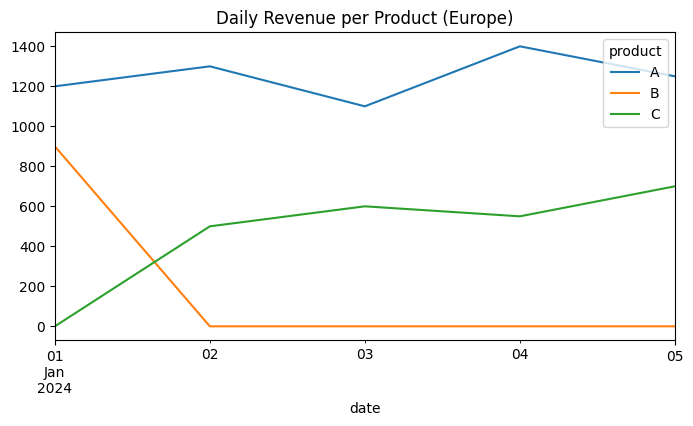

In [62]:
df_final.plot(x="date", y=["A", "B", "C"], figsize=(8, 4), title="Daily Revenue per Product (Europe)")